In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.describe()['price']

count    3.304000e+03
mean     8.932113e+05
std      6.225847e+05
min      1.000000e+05
25%      5.000000e+05
50%      6.700000e+05
75%      1.150000e+06
max      5.000000e+06
Name: price, dtype: float64

In [5]:
df=df.dropna()

In [6]:
correlations = data.corr()
correlations = correlations["price"].sort_values(ascending=False)
features = correlations.index[1:6]
correlations

price              1.000000
item_2             0.686121
facility_1         0.572182
secret_4           0.557345
room_size          0.445514
secret_10          0.445514
secret_7           0.445130
item_3             0.445130
item_1             0.415765
secret_1           0.402786
facility_3         0.378727
facility_2         0.352548
secret_8           0.324253
secret_6           0.319300
secret_3           0.299200
female             0.206592
item_5             0.202853
longitude          0.093013
male               0.079260
latitude           0.064751
distance_poi_B4    0.058845
distance_poi_A6    0.051421
distance_poi_A1    0.050952
facility_4         0.027651
distance_poi_B3   -0.032317
id                -0.058067
facility_5        -0.059582
distance_poi_A4   -0.139121
distance_poi_A5   -0.141022
distance_poi_A2   -0.142293
distance_poi_B1   -0.143138
distance_poi_A3   -0.173059
distance_poi_B2   -0.175917
secret_5          -0.399838
item_4            -0.399838
secret_2            

In [7]:
df.drop(columns=['id','latitude','longitude','male','female','secret_2','secret_9'], inplace=True)

C:\Users\fathinah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


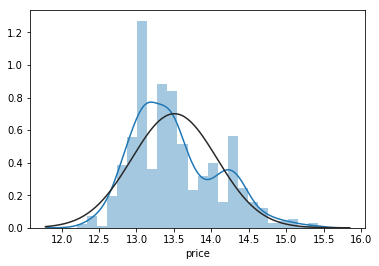

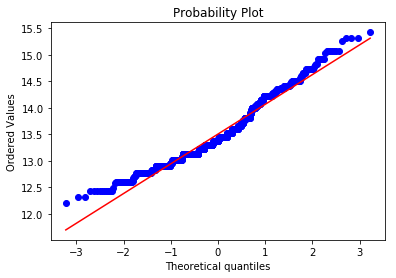

In [8]:
from scipy.stats import norm
dist = sns.distplot(np.log(df['price']), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(df['price']), plot=plt)

In [9]:
x = skew(np.log(df['price']))
y= kurtosis(np.log(df['price']))

print(x,y)

0.614623019229669 -0.11893961611180348


In [10]:
df['TransformedPrice']= np.log(df['price'])

In [11]:
df.head(5)

distance_poi_A1  distance_poi_A2  distance_poi_A3  distance_poi_A4  \
2202           5606.0           1816.0           4518.0           2781.0   
2203           4997.0           6052.0           8803.0           6911.0   
2204           6759.0           2807.0           2305.0           1002.0   
2205           9815.0           2770.0           2696.0           3858.0   
2206          15030.0           8036.0           6563.0           8663.0   

      distance_poi_A5  distance_poi_A6  distance_poi_B1  distance_poi_B2  \
2202           4495.0           4033.0           1776.0           4279.0   
2203           8640.0            474.0           5901.0           8545.0   
2204           1053.0           7378.0           3216.0           2677.0   
2205           4158.0           8176.0           2662.0           2064.0   
2206           8083.0          13392.0           7967.0           6244.0   

      distance_poi_B3  distance_poi_B4        ...         secret_1  secret_10  \
2202           3345.0           3954.0        ...              1.0       40.0   
2203           6087.0            651.0        ...              0.0       18.0   
2204           2686.0           7530.0        ...              0.0       18.0   
2205           6390.0           7798.0        ...              1.0       30.0   
2206          11313.0          12916.0        ...              0.0       18.0   

      secret_3  secret_4  secret_5  secret_6  secret_7  secret_8    price  \
2202       1.0       1.0       0.0       1.0       1.0       1.0  1750000   
2203       0.0       0.0       0.0       0.0       0.0       0.0   420000   
2204       0.0       0.0       1.0       0.0       0.0       0.0   450000   
2205       1.0       1.0       0.0       0.0       1.0       1.0  2000000   
2206       1.0       0.0       0.0       1.0       0.0       1.0   600000   

      TransformedPrice  
2202         14.375126  
2203         12.948010  
2204         13.017003  
2205         14.508658  
2206         13.304685  

[5 rows x 31 columns]

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,KFold

In [13]:
X_train = df.drop(["price","TransformedPrice"], axis=1).values
y_train = df["TransformedPrice"].values

In [14]:
X_training,X_test,y_training,y_test = train_test_split(X_train,y_train, test_size=0.3, random_state=0)

In [15]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
linreg_grid = GridSearchCV(linreg, parameters_lin, verbose=1, scoring="r2")
linreg_grid.fit(X_training, y_training)

print("Best LinReg Model: " + str(linreg_grid.best_estimator_))
print("Best Score: " + str(linreg_grid.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best LinReg Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Best Score: 0.6937441760224397


C:\Users\fathinah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished


In [16]:
linreg = linreg_grid.best_estimator_
linreg.fit(X_training,y_training)
lin_predicted = linreg.predict(X_test)
lin_r2= r2_score(y_test, lin_predicted)
lin_rmse = np.sqrt(mean_squared_error(y_test,lin_predicted))

print("R2 score :"+ str(lin_r2))
print("RMSE :"+ str(lin_rmse))

R2 score :0.6821522817268524
RMSE :0.3347570595374278


In [17]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.700182758822492


Ridge Model

In [18]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

C:\Users\fathinah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Ridge Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Best Score: 0.694203243574891


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished


In [19]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_test)
r2_ridge = r2_score(y_test, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.6819680074998553
RMSE Score: 0.3348540842391191


In [20]:
scores_ridge = cross_val_score(ridge, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: 0.7004816486006318


Random Forest Regressor

In [21]:
rf = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rf, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_training, y_training)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))

C:\Users\fathinah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best RandomForestRegressor Model: RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Best Score: 0.6944718540111551


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   42.1s finished


In [22]:
rf = grid_rf.best_estimator_
rf.fit(X_training, y_training)
rf_pred = rf.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: 0.6759497695248123
RMSE Score: 0.33800752008984447


# Evaluation

In [23]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge", "Random Forest Regressor"],
    "Best Score" : [linreg_grid.best_score_,  grid_ridge.best_score_, grid_rf.best_score_],
    "R Squared" : [str(lin_r2)[0:5], str(r2_ridge)[0:5], str(r2_rf)[0:5]],
    "RMSE" : [str(lin_rmse)[0:8], str(rmse_ridge)[0:8], str(rmse_rf)[0:8]]
})
model_performances.round(4)

print("Sorted by Best Score:")
model_performances.sort_values(by="Best Score", ascending=False)

Sorted by Best Score:


Model  Best Score R Squared      RMSE
2  Random Forest Regressor    0.694472     0.675  0.338007
1                    Ridge    0.694203     0.681  0.334854
0        Linear Regression    0.693744     0.682  0.334757

In [24]:
print("Sorted by R Squared:")
model_performances.sort_values(by="R Squared", ascending=False)

Sorted by R Squared:


Model  Best Score R Squared      RMSE
0        Linear Regression    0.693744     0.682  0.334757
1                    Ridge    0.694203     0.681  0.334854
2  Random Forest Regressor    0.694472     0.675  0.338007

In [25]:
print("Sorted by RMSE:")
model_performances.sort_values(by="RMSE", ascending=True)

Sorted by RMSE:


Model  Best Score R Squared      RMSE
0        Linear Regression    0.693744     0.682  0.334757
1                    Ridge    0.694203     0.681  0.334854
2  Random Forest Regressor    0.694472     0.675  0.338007

In [26]:
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
testing = pd.read_csv("test.csv")

In [28]:
X_test = testing.drop(columns=['id','latitude','longitude','male','female','secret_2','secret_9'])

In [29]:
submission_predictions = np.exp(rf.predict(X_test))

In [31]:
submission = pd.DataFrame({
        "id": testing["id"],
        "price": submission_predictions
    })

submission.to_csv("pricey.csv", index=False)
print(submission.shape)

(826, 2)
